In [1]:
#подключим библиотеку pandas
import pandas as pd


In [2]:
# загрузим датасет 
df = pd.read_csv('column_2C_weka.csv')

In [3]:
#Посмотрим на данные 
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [4]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


## Classes and attributes

The dataset includes six biomechanical attributes of the patient and the outcome or pathology. The attributes describe the vertebral column (group of vertebras, invertebrate discs, nerves, muscles, medulla and joints). These spino-pelvic system parameters include angle of pelvic incidence (PI), angle of pelvic tilt (PT), lordosis angle, sacral slope (SS), pelvic radius, and grade of slipping.

Each patient has six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius, and grade of spondylolisthesis. There is also a class or diagnosis for each patient–either binary: Normal (NO) and Abnormal (AB) 

Набор данных включает шесть биомеханических атрибутов пациента. Атрибуты описывают позвоночный столб (группа позвонков, беспозвоночные диски, нервы, мышцы, мозговое вещество и суставы). Эти параметры позвоночно-тазовой системы включают угол падения таза (PI), угол наклона таза (PT), угол лордоза, наклон крестца (SS), радиус таза и степень скольжения.

У каждого пациента есть шесть биомеханических признаков, определяемых формой и ориентацией таза и поясничного отдела позвоночника (в указанном порядке): наклон таза, наклон таза, угол поясничного лордоза, наклон крестца, радиус таза и степень спондилолистеза. Существует также класс или диагноз для каждого пациента: нормальный (NO) и ненормальный (AB).

In [5]:
# перекодируем целевую переменную 
df['class'] = df['class'].apply(lambda x: 1 if x=='Abnormal' else 0)

In [6]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [7]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0


In [8]:
#выделим данные (X) и признак (y), который мы будем предсказывать 
X=df.drop(['class'], axis=1)
y=df["class"]

In [9]:
#Подключим библиотеку для разделения данных на обучающую и тестовую выборки 
from sklearn.model_selection import train_test_split

In [10]:
#Разделим выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=23)

In [11]:
#Подключим из библиотеки метод, который строит (одну из) модель машинного обучения - линейный классификатор 
from sklearn.linear_model import LogisticRegression


In [12]:
#Объект, который будет обучаться
log_reg = LogisticRegression()

In [13]:
#Применяем функцию обучения 
log_reg.fit(X_train, y_train)

LogisticRegression()

In [14]:
#Можем предсказать значения на обучающих и тестовых данных
y_predict_train = log_reg.predict(X_train)
y_predict_test = log_reg.predict(X_test)

In [15]:
#Подкючим метод, который умеет считать отношение - предсказанных правильно значений к общему количеству
from sklearn.metrics import accuracy_score

In [16]:
print("Точность предсказания на обучающих данных: ", accuracy_score(y_predict_train, y_train))

Точность предсказания на обучающих данных:  0.8508064516129032


In [17]:
print("Точность предсказания на тестовых данных: ", accuracy_score(y_predict_test, y_test))

Точность предсказания на тестовых данных:  0.8709677419354839


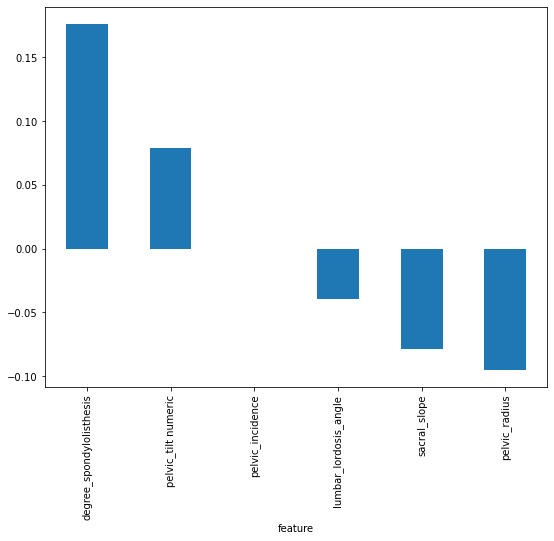

In [18]:
#Здесь написан код, который показывает, какие признаки при классификации оказались наиболее важные
featureImportance = pd.DataFrame({"feature": df.drop('class',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(9, 7));

In [19]:
#Применение другого метода (knn)
#метод классифицирует объект таким же классом как и наиболее похожие объекты  
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_predict_train_knn = knn.predict(X_train)
y_predict_test_knn = knn.predict(X_test)

print("Точность предсказания на обучающих данных (knn): ", accuracy_score(y_predict_train_knn, y_train))
print("Точность предсказания на тестовых данных (knn): ", accuracy_score(y_predict_test_knn, y_test))

Точность предсказания на обучающих данных (knn):  0.8588709677419355
Точность предсказания на тестовых данных (knn):  0.8709677419354839


In [20]:
#Другие метрики 
from sklearn.metrics import precision_score, recall_score, f1_score

print("Точность предсказания на обучающих данных (log_regr): ", precision_score(y_train, y_predict_train))
print("Точность предсказания на тестовых данных (log_regr): ", precision_score(y_test, y_predict_test))
print("Точность предсказания на обучающих данных (knn): ", precision_score(y_train, y_predict_train_knn))
print("Точность предсказания на тестовых данных (knn): ", precision_score(y_test, y_predict_test_knn))

Точность предсказания на обучающих данных (log_regr):  0.8895348837209303
Точность предсказания на тестовых данных (log_regr):  0.8974358974358975
Точность предсказания на обучающих данных (knn):  0.930379746835443
Точность предсказания на тестовых данных (knn):  0.8780487804878049


In [21]:
#Дополнительно: могли бы визуализировать данные. ПОдключим библиотеку для графиков
import matplotlib.pyplot as plt


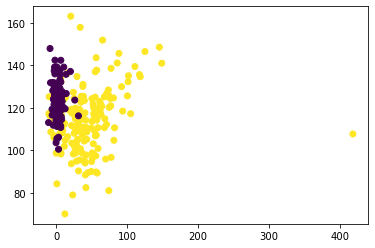

In [22]:
#Отобразим точки в зависимости от двух параметров, покрасим точки в зависимости от класса 
plt.scatter(df["degree_spondylolisthesis"], df["pelvic_radius"], c=y)

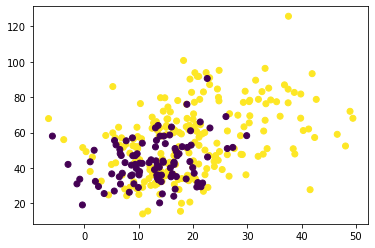

In [23]:
#Отобразим точки в зависимости от двух параметров, покрасим точки в зависимости от класса 
plt.scatter(df["pelvic_tilt numeric"], df["lumbar_lordosis_angle"], c=y)


## Набор данных по раку груди breast_canser 

__Задание__ Необходимо повторить образец на этом наборе данных. Сравнить точность предсказания на 2- методах. Какие признаки в методе log_res оказались наиболее важными? 

Характеристики набора данных:

Количество экземпляров 569

Количество атрибутов  30 числовых, прогнозных атрибутов и класс

Информация об атрибутах

    радиус (среднее расстояние от центра до точек по периметру)
    текстура (стандартное отклонение значений шкалы серого)
    периметр
    область
    гладкость (локальное изменение длины радиуса)
    компактность (периметр ^ 2 / площадь — 1.0)
    вогнутость (выраженность вогнутых участков контура)
    вогнутые точки (количество вогнутых участков контура)
    симметрия
    фрактальная размерность («приближение береговой линии» — 1)

Среднее значение, стандартная ошибка и «наихудший» или самый большой (среднее из трех наихудших / наибольших значений) этих характеристик были вычислены для каждого изображения, в результате чего было получено 30 функций. Например, поле 0 — средний радиус, поле 10 — радиус SE, поле 20 — худший радиус.

    класс:
        * WDBC- Malignant -злокачественный
        * WDBC-Benign-доброкачественный

    Сводные статистические данные 
    радиус (средний):	6,981	28.11
    текстура (среднее значение):	9,71	39,28
    периметр (средний):	43,79	188,5
    площадь (средняя):	143,5	2501,0
    гладкость (среднее значение):	0,053	0,163
    компактность (среднее значение):	0,019	0,345
    вогнутость (среднее значение):	0,0	0,427
    вогнутые точки (средние):	0,0	0,201
    симметрия (среднее значение):	0,106	0,304
    фрактальная размерность (среднее):	0,05	0,097
    радиус (стандартная ошибка):	0,112	2,873
    текстура (стандартная ошибка):	0,36	4,885
    периметр (стандартная ошибка):	0,757	21,98
    площадь (стандартная ошибка):	6,802	542,2
    плавность (стандартная ошибка):	0,002	0,031
    компактность (стандартная ошибка):	0,002	0,135
    вогнутость (стандартная ошибка):	0,0	0,396
    вогнутые точки (стандартная ошибка):	0,0	0,053
    симметрия (стандартная ошибка):	0,008	0,079
    фрактальная размерность (стандартная ошибка):	0,001	0,03
    радиус (худший):	7,93	36,04
    текстура (худшая):	12.02	49,54
    периметр (худший):	50,41	251,2
    площадь (худшая):	185,2	4254,0
    гладкость (худшая):	0,071	0,223
    компактность (худшая):	0,027	1.058
    вогнутость (худшая):	0,0	1,252
    вогнутые точки (худшие):	0,0	0,291
    симметрия (худшая):	0,156	0,664
    фрактальная размерность (худшая):	0,055	0,208

Отсутствующие значения атрибутов: Нет

Распределение классов: 212 — злокачественный, 357 — доброкачественный

In [25]:
#Можно загрузить датасет из набора

from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True)['frame']

#Класс, который предсказываем в колонке target